<a href="https://colab.research.google.com/github/4GeeksAcademy/regresion_logistica_machine-learning-python-template/blob/main/Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Analisis exploratorio




*   1.Planteamiento del problema y recopilación de datos




In [1]:
import pandas as pd

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


age. Edad del cliente (numérico)  
job. Tipo de trabajo (categórico)  
marital. Estado civil (categórico)
education. Nivel de educación (categórico)  
default. ¿Tiene crédito actualmente? (categórico)  
housing. ¿Tiene un préstamo de vivienda? (categórico)  
loan. ¿Tiene un préstamo personal? (categórico)  
contact. Tipo de comunicación de contacto (categórico)  
month. Último mes en el que se le ha contactado (categórico)  
day_of_week. Último día en el que se le ha contactado (categórico)  
duration. Duración del contacto previo en segundos (numérico)  
campaign. Número de contactos realizados durante esta campaña al cliente (numérico)  
pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)  
previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)  
poutcome. Resultado de la campaña de marketing anterior (categórico)  
emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)  
cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)  
cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)  
euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)  
nr.employed. Número de empleados. Indicador trimestral (numérico)  
y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)


*   2.Exploración y limpieza de datos.



In [12]:
data.shape

(41188, 21)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Histogramas de las variables que enuentro relevantes

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

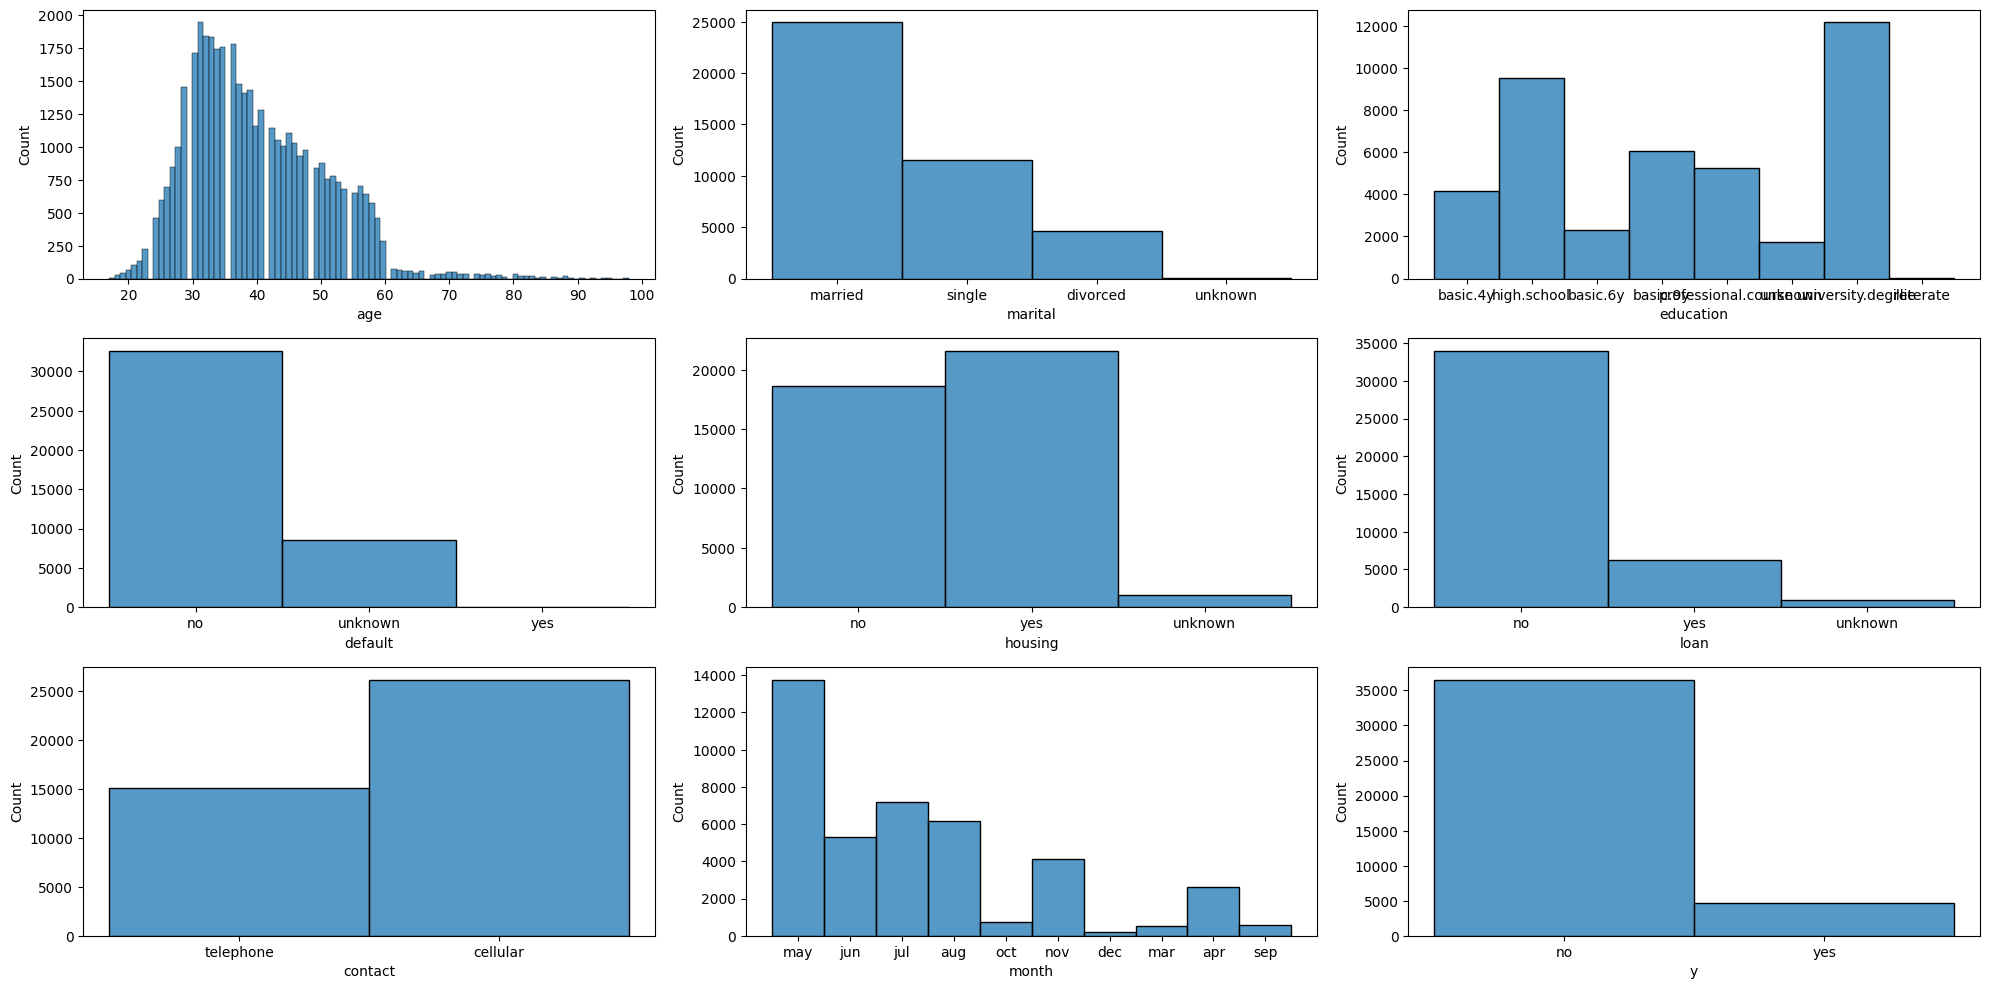

In [25]:
fig, axis = plt.subplots(3, 3, figsize=(20, 10))

# Creamos los histogramas
sns.histplot(ax = axis[0,0], data = data, x = "age")
sns.histplot(ax = axis[0,1], data = data, x = "marital")
sns.histplot(ax = axis[0,2], data = data, x = "education")
sns.histplot(ax = axis[1,0], data = data, x = "default")
sns.histplot(ax = axis[1,1], data = data, x = "housing")
sns.histplot(ax = axis[1,2], data = data, x = "loan")
sns.histplot(ax = axis[2,0], data = data, x = "contact")
sns.histplot(ax = axis[2,1], data = data, x = "month")
sns.histplot(ax = axis[2,2], data = data, x = "y")


# Ajustamos el diseño para que no se superpongan
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Análisis numérico-categórico (completo)

In [15]:
# Primero tenemos que factorizar las categoricas.
from sklearn.preprocessing import MinMaxScaler

data["job_n"] = pd.factorize(data["job"])[0]
data["marital_n"] = pd.factorize(data["marital"])[0]
data["education_n"] = pd.factorize(data["education"])[0]
data["default_n"] = pd.factorize(data["default"])[0]
data["housing_n"] = pd.factorize(data["housing"])[0]
data["loan_n"] = pd.factorize(data["loan"])[0]
data["contact_n"] = pd.factorize(data["contact"])[0]
data["month_n"] = pd.factorize(data["month"])[0]
data["day_of_week_n"] = pd.factorize(data["day_of_week"])[0]
data["poutcome_n"] = pd.factorize(data["poutcome"])[0]
data["y_n"] = pd.factorize(data["y"])[0]
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

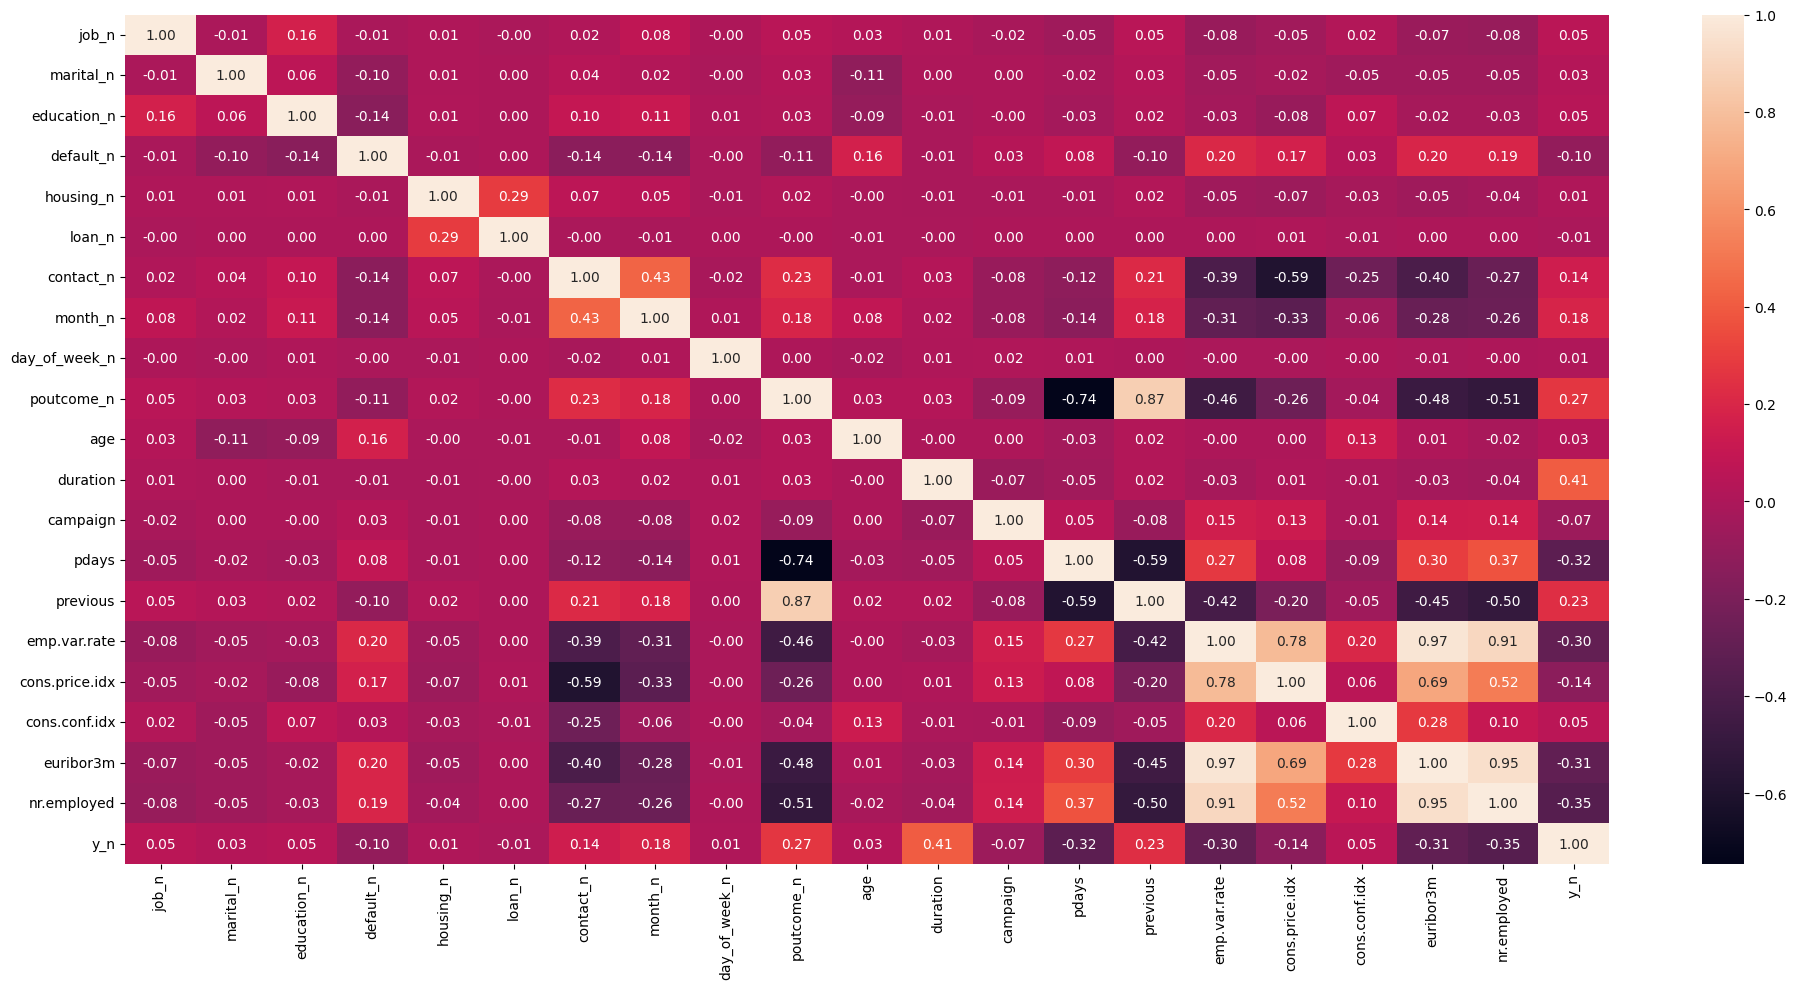

In [20]:
fig, axes = plt.subplots(figsize=(20, 10))

sns.heatmap(data[["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Hay bastante correlación entre par de variables tanto positiva como negativa